In [1]:
%pylab inline
from statsmodels.kernel_methods import kde, bandwidths, kde_nd
from scipy import stats, integrate

Populating the interactive namespace from numpy and matplotlib


## Defining the target distribution

In [2]:
dist1 = stats.norm(loc=1.2, scale=0.4)
dist2 = stats.norm(loc=-3, scale=2)
N = int(1e4)
d = r_[dist1.rvs(N), dist2.rvs(N)]
k = kde.KDE(d, method=kde_nd.Cyclic())
est = k.fit()
xs = r_[-12:6:2048j]
def pdf(x):
    return (dist1.pdf(x) + dist2.pdf(x))/2

### Estimation with Scott's rule of thumb:

Text(0.5, 1.0, "Scott's rule of thumb for bandwidth estimation")

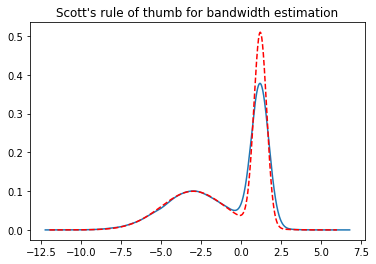

In [3]:
f = figure()
gr, gr_pdf = est.grid()
plot(gr.full(), gr_pdf)
plot(xs, pdf(xs), 'r--')
title("Scott's rule of thumb for bandwidth estimation")

## Estimation with cross-validation

**Note:** We will use the folding method with 10 folds and grid-based approximation

In [11]:
%%time
k1 = k.copy()
k1.bandwidth = bandwidths.CrossValidation(bandwidths.CVIMSE, folding=10, use_grid=True)
est1 = k1.fit()

CPU times: user 1.01 s, sys: 8 µs, total: 1.01 s
Wall time: 1 s


In [12]:
est1.bandwidth

0.07809895989873564

In [13]:
est.bandwidth

0.370246921001418

Text(0.5, 1.0, 'Cross-validation for bandwidth estimation')

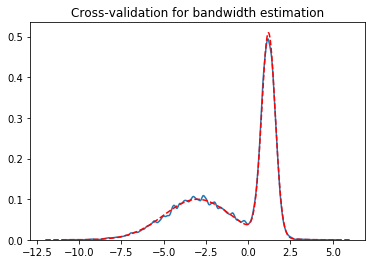

In [14]:
f = figure()
xs1, pdf1 = est1.grid()
plot(xs1.full(), pdf1)
plot(xs, pdf(xs), 'r--')
ylim(ymin=0)
title('Cross-validation for bandwidth estimation')

The result is still much much better

### Full Leave-One-Out method for the cross-validation

In [16]:
%%time
k2 = k.copy()
k2.bandwidth = bandwidths.CrossValidation(bandwidths.CVIMSE)
est2 = k2.fit()

CPU times: user 5min 1s, sys: 16.1 ms, total: 5min 1s
Wall time: 5min 1s


In [17]:
est2.bandwidth

0.07520640582841205

### Using Randomized leave-one-out method for the cross-validation

In [18]:
%%time
k3 = k.copy()
k3.bandwidth = bandwidths.CrossValidation(bandwidths.CVIMSE, sampling=1000)
est3 = k3.fit()

CPU times: user 15.1 s, sys: 3 µs, total: 15.1 s
Wall time: 15.1 s


In [19]:
est3.bandwidth

0.14983430084276061